In [23]:
import pandas as pd
import numpy as np
from pathlib import Path
import json
import utility
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
trials = []
for path in Path("/home/vijaymarupudi/techno/development/work/clustering-data-cleaning/build/normalized").glob("*.json"):
    trials.extend(json.loads(path.read_bytes()))
    
for trial in trials:
    if trial["flipped"]:
        for cluster in trial["clusters"]:
            for point in cluster:
                point["x"] = 800 - point["x"]
                point["y"] = 500 - point["y"]

In [25]:
df = pd.DataFrame.from_dict(trials)
df

,startDateTime,startTimestamp,endTimestamp,clusters,base_uuid,unique_uuid,group,number_of_points,std_vaccumed_z_score,flipped,block,set,experiment_version,participant_id,numberOfTries,trial_number
0,1581632876274,1488138.000,1505018.000,"[[{'x': 386, 'y': 148}, {'x': 270, 'y': 44}, {...",823dc71a-6c2e-42ea-910b-4e53f7bd4a90,26891aa4-8a20-4b0a-9331-0584e8c29593,disperse,20,1.046253,False,1,1,1,8,NaN,1
1,1581632900434,1512298.000,1520089.000,"[[{'x': 8, 'y': 417}, {'x': 80, 'y': 348}, {'x...",fccbc907-4526-43e2-8ded-142b804b471a,c18abb70-6723-42d2-a3d7-d53daac372b4,clustered,10,-1.971192,False,1,1,1,8,NaN,2
2,1581632909849,1521714.000,1531642.000,"[[{'x': 77, 'y': 369}, {'x': 108, 'y': 376}, {...",e0b28b0d-8194-475b-98a6-6931d1ff1004,d7ecfd90-6c52-432d-b90b-849eb2692bd8,clustered,20,-1.979870,False,1,1,1,8,NaN,3
3,1581632920961,1532826.000,1538714.000,"[[{'x': 68, 'y': 149}, {'x': 275, 'y': 147}, {...",b3697dbc-04ee-4762-a98d-5773cf0c7e84,e2be293d-0bbf-42a5-8fe5-748c9f003aa5,clustered,10,-2.039006,False,1,1,1,8,NaN,4
4,1581632928488,1540354.000,1553090.000,"[[{'x': 354, 'y': 471}, {'x': 56, 'y': 367}, {...",37ecaaa0-dbb1-4b98-ad55-ce73229d5866,66045880-1a51-471d-ac44-1564eb2f9453,clustered,20,-1.964858,False,1,1,1,8,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5259,1591622537952,3303212.260,3311594.870,"[[{'x': 382, 'y': 136}, {'x': 391, 'y': 183}],...",42d361fa-4736-4e88-983e-5a08e9ba6071,76f583c2-d8cc-446d-8ef7-0d469b75f031,disperse,20,1.001153,True,4,2,3,10035,1.0,108
5260,1591622548928,3314188.370,3324170.460,"[[{'x': 646, 'y': 246}, {'x': 738, 'y': 285}, ...",49f28baf-c341-4fb1-a75b-0ff70240de39,8f3ce56e-8e2b-4702-8fb1-0a1a409bdb65,disperse,20,0.952234,True,4,2,3,10035,1.0,109
5261,1591622560420,3325680.550,3331786.545,"[[{'x': 125, 'y': 292}, {'x': 115, 'y': 282}],...",6b397277-e2cf-4165-9f1a-32aeef65ebbc,68f60018-7175-401c-a4fd-1b1eacea4eba,clustered,10,-2.031332,False,4,2,3,10035,1.0,110
5262,1591622567698,3332958.345,3341058.410,"[[{'x': 410, 'y': 170}, {'x': 420, 'y': 125}, ...",e9bc8099-ff66-4017-abd4-33cd8dbcc2d6,3cf902d3-13c6-44bb-ac24-e071d8046825,clustered,25,-2.014654,False,4,2,3,10035,1.0,111


In [31]:
def group_calc_fm(vals):
    x = vals.iloc[0]
    y = vals.iloc[1]
    assert len(vals) == 2
    return utility.calc_fowlkes_mallows(x, y)

def agg_flipped(vals):
    return any(vals)

out = (df.groupby(by=["participant_id", "base_uuid"])
       .agg({'clusters': group_calc_fm, "flipped": agg_flipped, "group": lambda x: x.iloc[0]})
       .rename(columns={'clusters': 'human_fm'}))
out

human_fm  flipped  \
participant_id base_uuid                                                 
1              0f18f0ad-f23d-4fc9-a761-3920c107550b  0.673496     True   
               0f9a9c80-cdab-4071-8d56-27965b585a10  0.727161     True   
               2bb1495b-1ef6-4943-bb48-662371f50b30  0.953463     True   
               2f24428f-632d-4374-b0ca-cb3d0ae04bc5  0.767561     True   
               2f452eee-c0bb-437c-bd4e-f35ee9fe9ff6  0.754342    False   
...                                                       ...      ...   
10038          f54baffc-bc26-4c4d-b940-824d08daf230  0.915811     True   
               fa83ff0a-5066-4c01-bdf6-909bc3dda074  0.853057    False   
               fbb6c70e-fe6e-4634-8737-975d829a36cc  1.000000    False   
               fccbc907-4526-43e2-8ded-142b804b471a  1.000000     True   
               fdb55140-d76a-43e5-b66a-8883dc677b94  0.974824    False   

                                                         group  
participant_id base_uuid                                        
1              0f18f0ad-f23d-4fc9-a761-3920c107550b  clustered  
               0f9a9c80-cdab-4071-8d56-27965b585a10   disperse  
               2bb1495b-1ef6-4943-bb48-662371f50b30  clustered  
               2f24428f-632d-4374-b0ca-cb3d0ae04bc5   disperse  
               2f452eee-c0bb-437c-bd4e-f35ee9fe9ff6  clustered  
...                                                        ...  
10038          f54baffc-bc26-4c4d-b940-824d08daf230  clustered  
               fa83ff0a-5066-4c01-bdf6-909bc3dda074  clustered  
               fbb6c70e-fe6e-4634-8737-975d829a36cc   disperse  
               fccbc907-4526-43e2-8ded-142b804b471a  clustered  
               fdb55140-d76a-43e5-b66a-8883dc677b94  clustered  

[2632 rows x 3 columns]

In [32]:
out.to_csv('human_data_fm.csv')

<AxesSubplot:xlabel='group', ylabel='human_fm'>

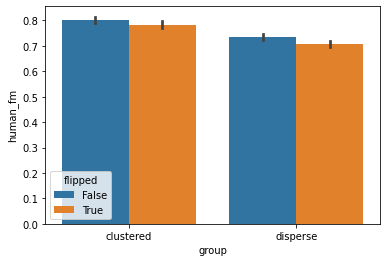

In [34]:
sns.barplot(x="group", y = "human_fm", hue="flipped", data=out)

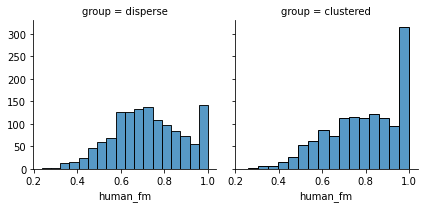

In [37]:
g = sns.FacetGrid(out, col="group", col_order=["disperse", "clustered"])
g.map(sns.histplot, "human_fm")